In [ ]:
# Data Wrangling libraries
import pandas as pd 
import numpy as np 

# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.ticker as ticker

# Machine Learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Graph style
#sns.set_style("whitegrid")


import os
import shutil  
from os import path

In [ ]:
base = pd.read_csv("Movies_new.csv")

Describe function show that the Budget and Revenue columns has 0 as a min values, however, the info() function showed that there isnt any NaN value

In [ ]:
base.count()
base.isnull().sum()

This function replace all 0 value to NaN and then it is possible to fill this values with the median of the specific column

In [ ]:
replace = base.replace(0, np.nan, inplace=True)

In [ ]:
budget_median = base.Budget.median()
revenue_median = base.Revenue.median()

In [ ]:
base["Budget"].fillna(budget_median, inplace = True)
base["Revenue"].fillna(revenue_median, inplace = True)

In [ ]:
base["Profit"] = base["Revenue"] - base["Budget"]
base.to_csv("Movies_profit.csv", index=False)

# Graph Analysis

# Boxplot comparing user rating and movies database average ratings

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize = (12,6), sharey=True)
fig.suptitle("Comparison between User Rating and Movie Database Average Ratings", fontsize=16)
plt.subplots_adjust(wspace=0, hspace=0)
plt.ylim(1,5)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.despine(left= True)



user_boxplot = sns.boxplot(y = base["Rating"], 
                            color="lightskyblue", 
                            showmeans=True, 
                            meanprops= {"marker":"o",
                                        "markerfacecolor":"white", 
                                        "markeredgecolor":"black", 
                                        "markersize":"7"},
                            medianprops = {"color":"orange", 
                                           "linestyle":"--"}, 
                            ax=axs[0])


database_boxplot = sns.boxplot(y = base["Vote Average"], 
                           color="violet", 
                           showmeans=True,
                           meanprops= {"marker":"o",
                                       "markerfacecolor":"white", 
                                       "markeredgecolor":"black", 
                                       "markersize":"7"},
                           medianprops = {"color":"springgreen", 
                                          "linestyle":"--"},
                           ax=axs[1]).set(ylabel=None)

plt.savefig("Graphs/Boxplot_Ratings")

# Transform the genres in a Series of genres

In [ ]:
df_genres_id= pd.Series(base["Genres"].values, index = base["ID"], name = "Genres")
split_genres = df_genres_id.str.split("|", expand = False)
genres_explode = split_genres.explode()

genres_explode

In [ ]:
genres_count = genres_explode.value_counts()

genres_count

In [ ]:
# genres_df = genres_explode.to_frame()


In [ ]:
genres_explode.unique()

# Genres x Rating x Vote Average

# Year x Rating

* Deixar esse gráfico legal
* Arrumar o hue
* Tentar colocar uma colorbar somente nos valores de vote average relacionando com vote count

In [ ]:
sns.set(rc={"figure.figsize": (12,10)},font_scale=1.5)
sns.set_style("white")



user_ratings= sns.scatterplot(x = base["Rating"], 
                y = base["Year"],
                s = 200,
                color = "green"
                )

database_rating = sns.scatterplot(x = base["Vote Average"], 
                y = base["Year"],
                s = 200,
                hue = base["Vote Average"]
                )

#cbar = plt.colorbar(database_rating) 

user_ratings.set(xlabel='Rating', ylabel='Year')

plt.savefig("Graphs/Year_Rating")

# WordCloud dos generos

In [ ]:
all_genres = " ".join(s for s in genres_explode).strip()

all_genres

In [ ]:
all_genres = " ".join(s for s in genres_explode)


wordcloud = WordCloud(background_color="black",
                      font_path='Andale Mono',
                      width=1600, height=800,
                      collocations=False,
                      colormap = "viridis").generate(all_genres)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")

plt.savefig("Graphs/WordCloud")

In [ ]:
wordcloud.words_

Provavelmente não vou usar esse gráfico

In [ ]:
palette = sns.color_palette("PiYG_r", 18)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(10,6)})


barplot = sns.barplot(genres_count.index,
                      genres_count.values,
                      palette = palette
                      )

plt.xticks(rotation=45, fontsize=12, ha = "right")
plt.yticks(fontsize=12)

# Top 10 voted movies

In [ ]:
vote_count = base.sort_values("Vote Count", ascending= False)
top_voted = vote_count.head(n =10)

top_voted

In [ ]:
palette = sns.color_palette("Purples_r", 10)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(10,6)})


barplot = sns.barplot(x= top_voted["Vote Count"],
                      y = top_voted["Movie"], 
                      palette = palette,
                      orient = "h").set(ylabel = None)

plt.xticks(rotation=45, fontsize=12, ha = "center")
plt.yticks(fontsize=12)

plt.savefig(plt.savefig("Graphs/Top Voted Movies"), bbox_inches='tight')

# Top 10 rated movies

In [ ]:
vote = base.sort_values("Vote Average", ascending= False)
top_rated = vote.head(n =10)

top_rated

# Finding the linear regression between Revenue and Profit

* Trying to discover if it is possible to predict the Profit by the Revenue - any relationship

In [ ]:
base.corr()

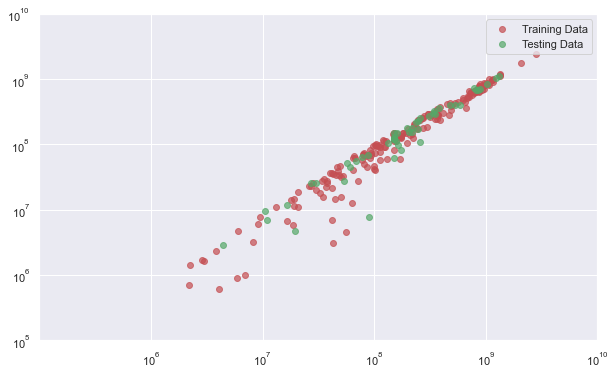

In [68]:
plt.xscale('log')
plt.yscale('log')
plt.xlim(100000,10000000000)
plt.xticks([1e6, 1e7, 1e8, 1e9, 1e10])
plt.ylim(100000,10000000000)
plt.yticks([1e5,1e6, 1e7, 1e8, 1e9, 1e10])
# ax = sns.scatterplot(x=base['Revenue'], y=base['Profit'])  

# It's necesary to split the data into train and test. First the model is train using a speciffic part of data and after the model will be testing in the remain data

#If the size of samples was not specify, the default size is 25% of the data however the best size is 80:20


X_train, X_test, y_train, y_test = train_test_split(base.Revenue, base.Profit, train_size = 0.8, test_size = 0.2)

# Ploting the train and test data

plt.scatter(X_train,y_train, label = "Training Data", color = "r", alpha= .7)
plt.scatter(X_test,y_test, label = "Testing Data", color = "g", alpha= .7)
plt.legend()


# regressor = LinearRegression()
# lr.fit(X_train.values.reshape(-1,1), y_train.values)

# prediction = lr.predict(X_test.values.reshape(-1,1))
# plt.plot(X_test,prediction,label = "Linear Regression", color = "b")
# plt.scatter(X_test,y_test, label = "Actual Test Data", color = "g", alpha=.7)
# plt.legend()


# sns.distplot(base['Profit'])

# corre = np.corrcoef(base["Profit"],base["Revenue"])

# Scatterplot Revenue x Profit

In [ ]:
plt.xscale('log')
plt.yscale('log')
plt.xlim(100000,10000000000)
plt.xticks([1e6, 1e7, 1e8, 1e9, 1e10])
plt.ylim(100000,10000000000)
plt.yticks([1e5,1e6, 1e7, 1e8, 1e9, 1e10])



ax = sns.scatterplot(x=base['Revenue'], y=base['Profit'])

This is a little mess because of 2 movies with higher revenue and profit. Let's find out which movies are they

In [ ]:
base.sort_values("Profit", ascending= False).head(10)

In [ ]:
base.describe()

In [ ]:
base.sort_values("Budget",ascending = False).head(10)
base.sort_values("Revenue",ascending = False).head(10)

* Ver se esse gráfico abaixo vai ser interessante e se sim, inverter a ordem dos filmes

In [ ]:
plt.xscale('log')
plt.xlim(10000,10000000000)
plt.xticks([1e5,1e6, 1e7, 1e8, 1e9, 1e10])
sns.set_style("white")

budget = base.sort_values("Budget", ascending = False).iloc[0:20]


lollipop = plt.hlines(budget["Movie"], 
          xmin=base["Budget"], 
          xmax=base['Revenue'],
          color = "navy",
          )

In [ ]:
base.sort_values("Budget", ascending= False).head(20)

# Relation between Year and Revenue

* Melhorar o hue (eixo)

In [ ]:
plt.yscale("log")
sns.set_context("notebook", font_scale=1.2)
sns.set(rc = {"figure.figsize":(12,8)})


# sns.scatterplot(data = base, 
#                 x = "Year", 
#                 y = "Budget",
#                 alpha=.6,
#                 color = "darkviolet",
#                 s = 150,
#                 marker = "X")

sns.scatterplot(data = base, 
                x = "Year", 
                y = "Revenue",
                alpha=1,
                color = "navy",
                s = 150,
                hue = "Rating"
                )


plt.ylim(100000,10000000000)
plt.yticks([1e6, 1e7, 1e8, 1e9, 1e10])
plt.xlim(1940,2020, 10)


In [ ]:
#mask = np.triu(base.corr())
values = base[["Year", "Rating","Runtime", "Vote Average", "Vote Count", "Budget", "Revenue", "Profit"]]
sns.set(rc={'figure.figsize':(10,6)})

#creating the colormap
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)


sns.heatmap(values.corr(), 
            annot = True, 
            vmin=-1, vmax=1, center= 0, 
            cmap= cmap,
            cbar_kws = {"ticks":[-1, -.5,0,.5,1]}
            )
            
plt.xticks(rotation = 45, ha = "center")


plt.savefig("Graphs/Correlation Heatmap")